# Code :

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('heart.csv')
# this fill show the top 5 values in of the data set

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# The code df.isnull().sum() is used to count the number of missing values or null values in each column of a Pandas DataFrame df.
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

-here in this dataset there is no null value
-If there are null values in a dataset, then we need to handle them before using the dataset for machine learning. This is because most machine learning algorithms cannot handle missing values and may give incorrect results or raise errors if missing values are present.
-if there is a null value in the data set either we can remove that perticular row or column or can put the average value of that perticular column

In [6]:
# To get the entire information about the null values and the data types of the features
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


all data is in numeric value so we do not need to convert data from text to numeric value

<AxesSubplot: >

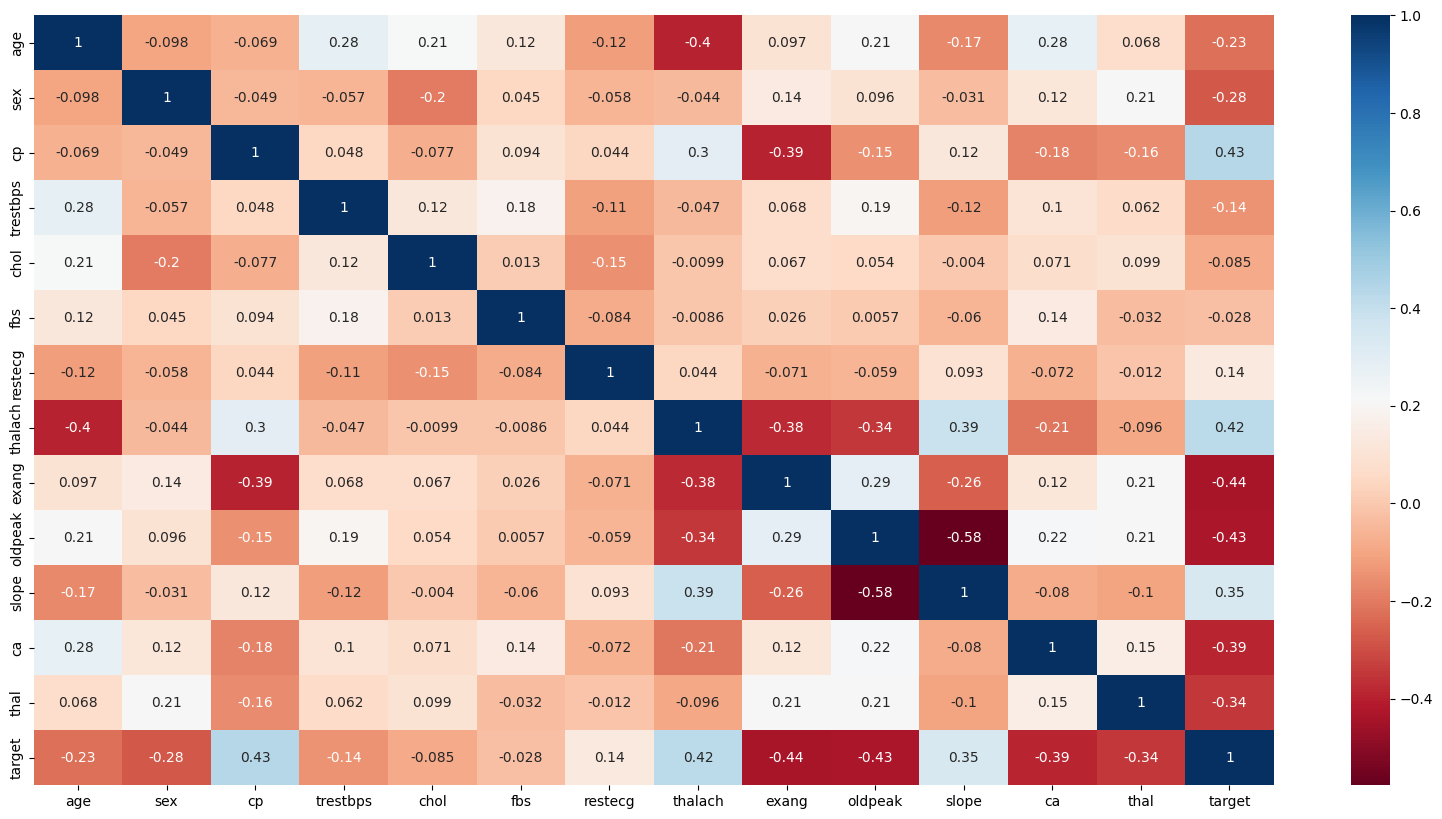

In [7]:
#  creating heatmap using seaborn library
#  df.corr() calculates correlation between all column in the dataframe
# The annot=True argument displays the correlation coefficients in each cell of the heatmap.

plt.figure(figsize=(20,10)) # 20 inch width and 10 inch height
sns.heatmap(df.corr(),annot=True,cmap='RdBu')

-in this heatmap
    positive correlation is shown in blue
    negative correlation is shown in red
-we observed 
    we observed positive correlation between target and cp,thalach and slope
    


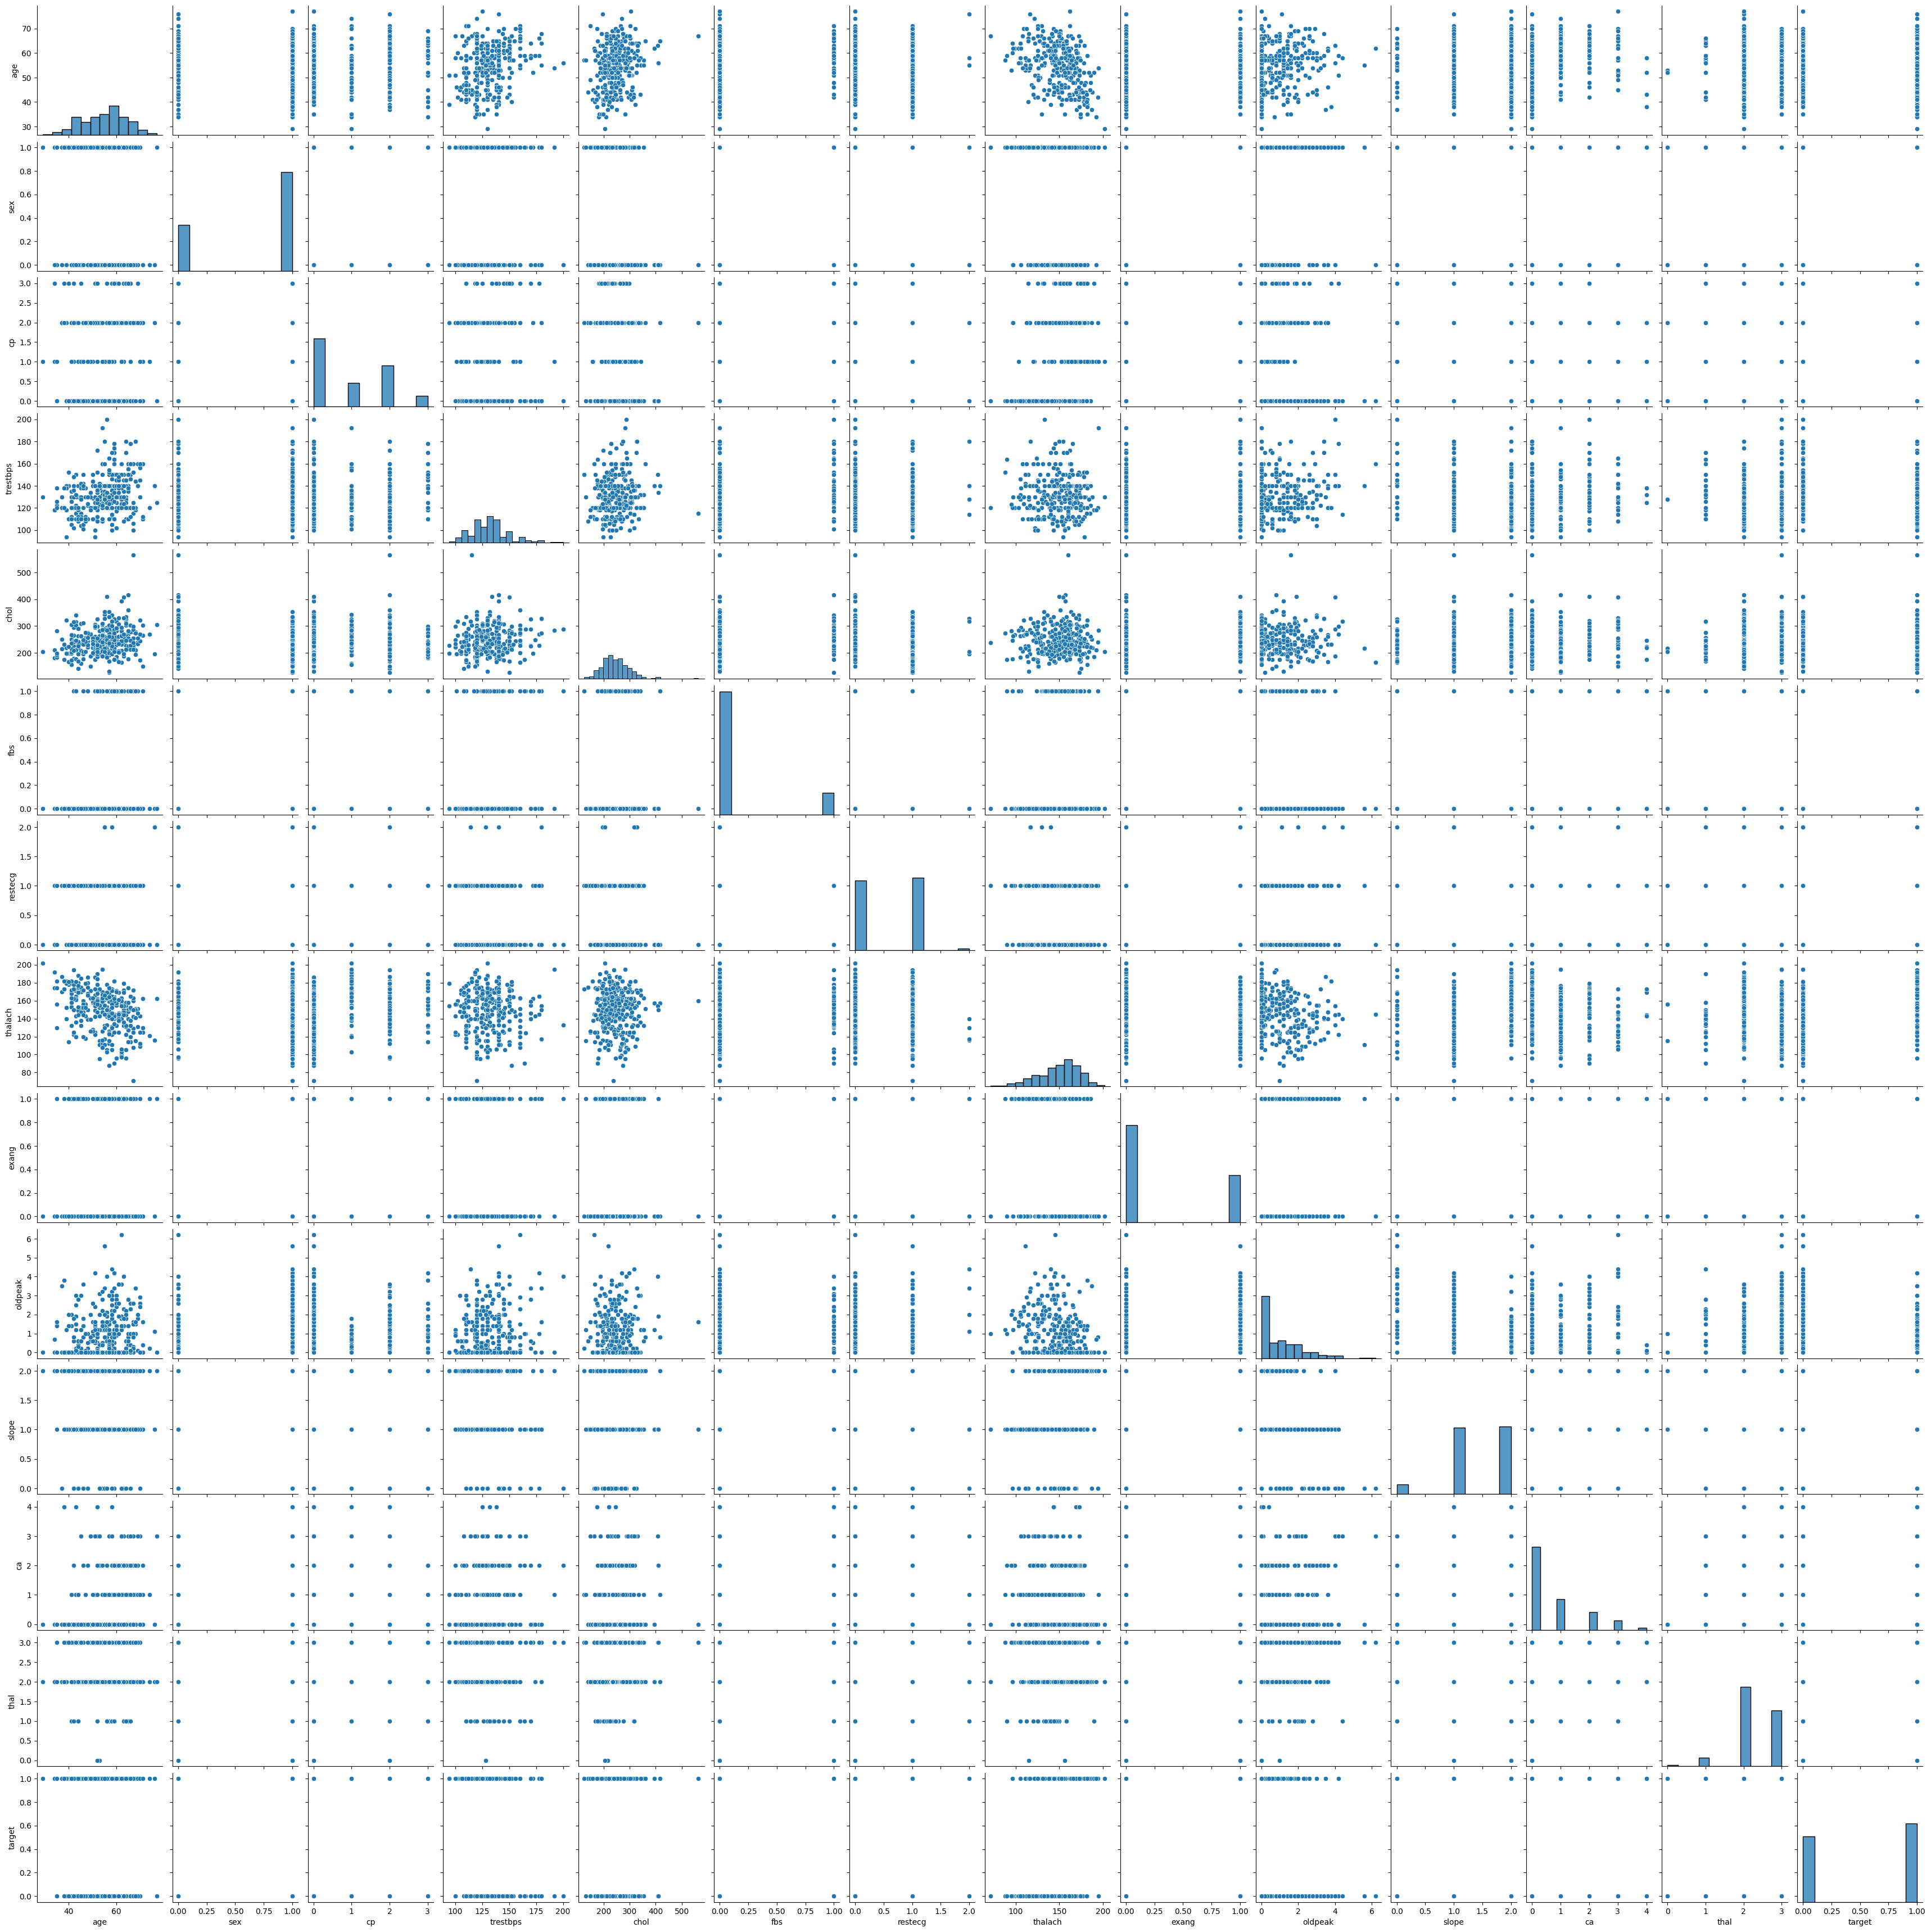

In [8]:
sns.pairplot(data=df)

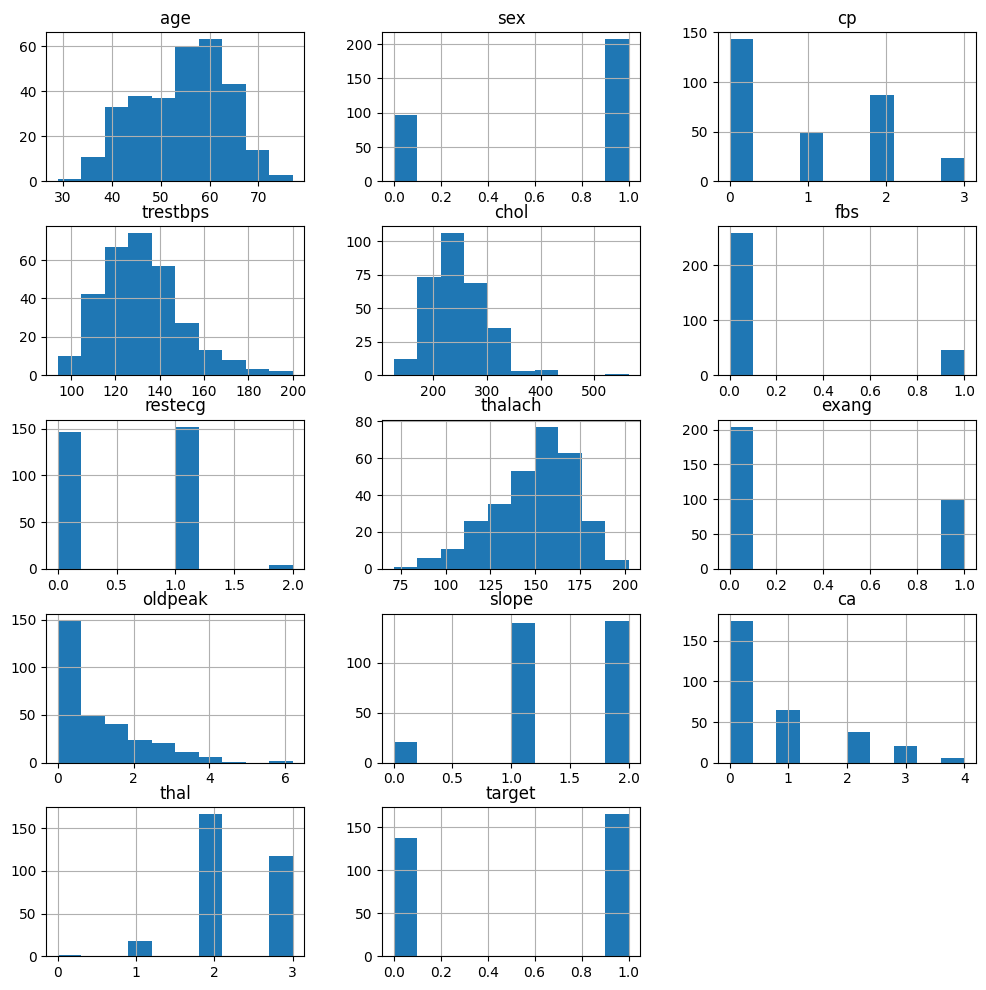

In [9]:
# histogram of the feature
# shows the frequency of the feature
df.hist(figsize=(12,12),layout=(5,3));
plt.show()

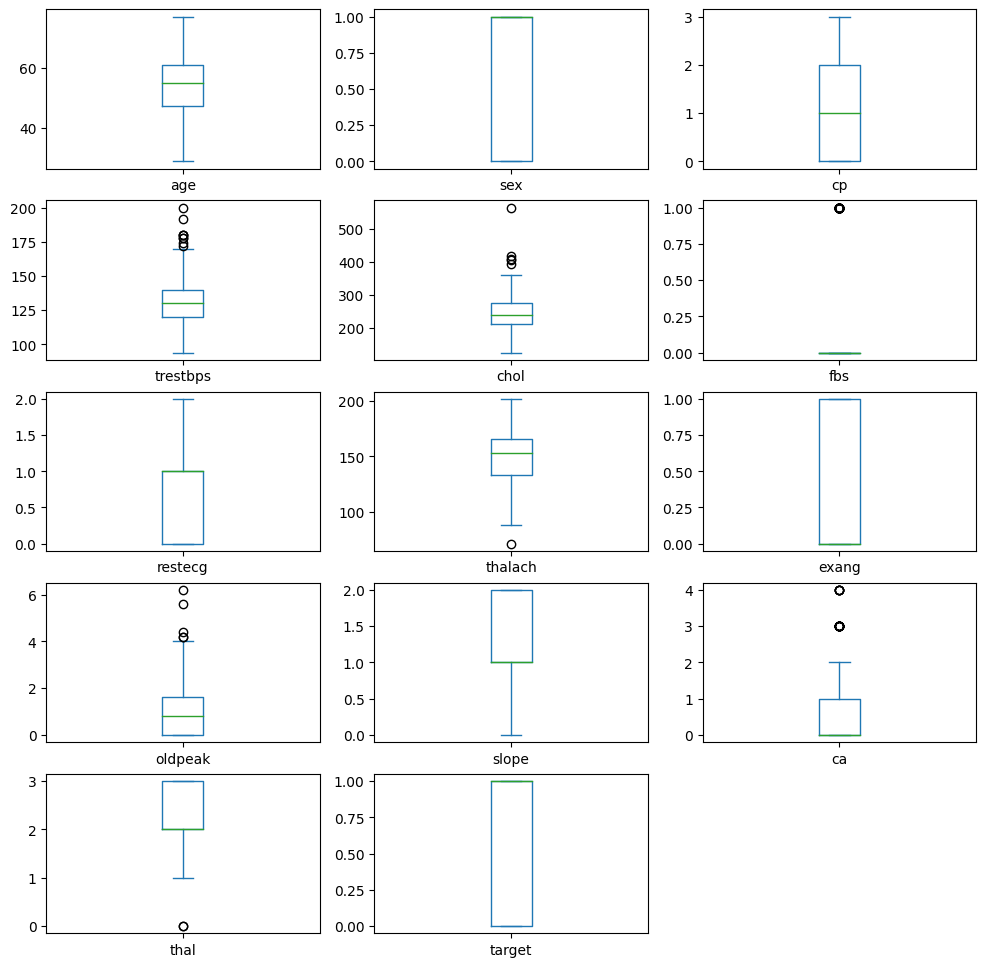

In [10]:
df.plot(kind='box',subplots=True,layout=(5,3),figsize=(12,12))
plt.show()

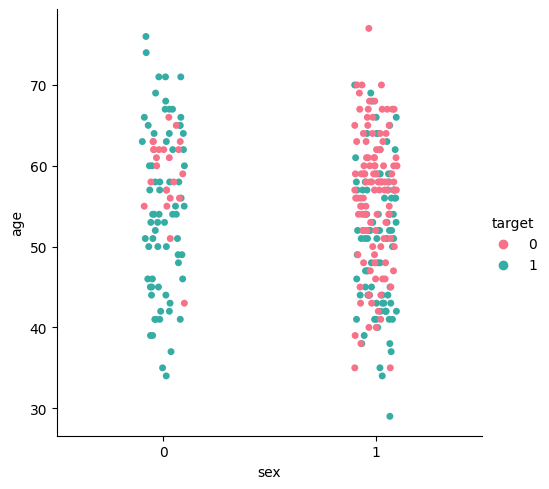

In [11]:
sns.catplot(data=df,x='sex',y='age',hue='target',palette='husl')

<AxesSubplot: xlabel='sex', ylabel='chol'>

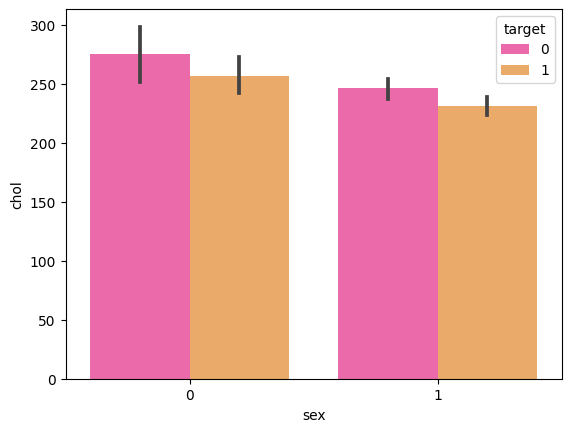

In [12]:
# sex Vs cholestrol level
sns.barplot(data=df,x='sex',y='chol',hue='target',palette='spring')

In [13]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [14]:
# cp= chest pain
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

<AxesSubplot: xlabel='cp', ylabel='count'>

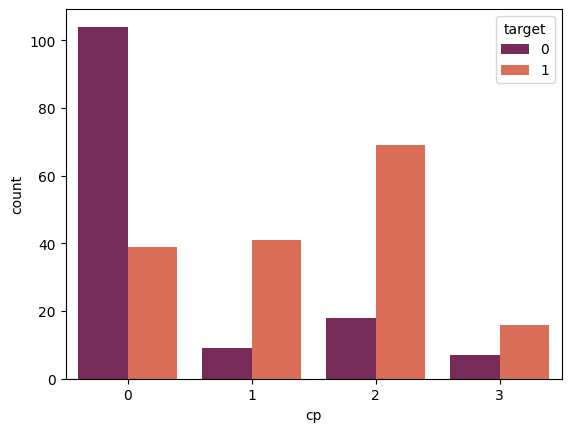

In [15]:
sns.countplot(x='cp',hue='target',data=df,palette='rocket')

1. Typical agina pain
2. atypical agina pain
3. non- aginal pain
4. asymptomatic 

(1) and (2) both type of agina pain are symptoms of CAD(Typical agina pain is the most common)

In [16]:
gen=pd.crosstab(df['sex'],df['target'])
print(gen)

target    0   1
sex            
0        24  72
1       114  93


<AxesSubplot: xlabel='sex'>

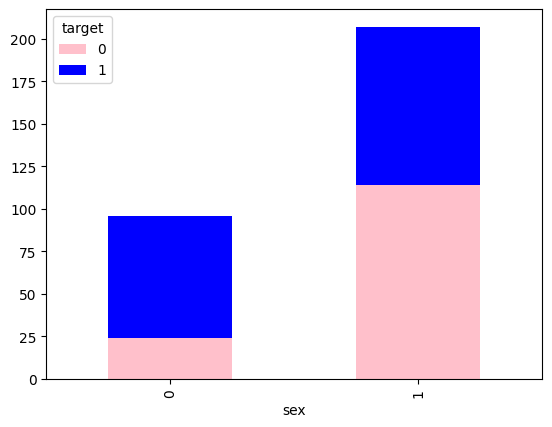

In [17]:
gen.plot(kind='bar',stacked=True,color=['pink','blue'],grid=False)

In [18]:
#chest_pain=pd.crosstab(df['cp'],df['target'])
#chest_pain

In [19]:
#chest_pain.plot(kind='bar',stacked=True,color=['purple','blue'],grid=False)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
ss=StandardScaler()
column_to_scale=['age','trestbps','chol','thalach','oldpeak']
df[column_to_scale]=ss.fit_transform(df[column_to_scale])

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


before scaling

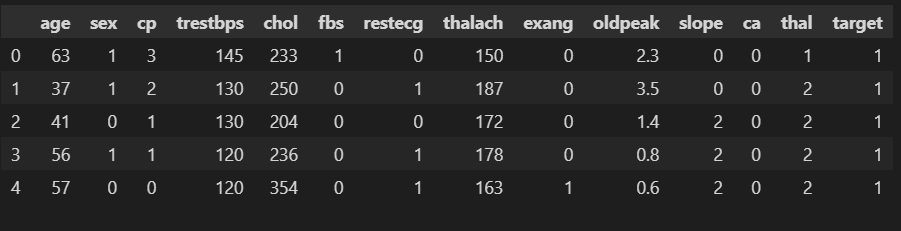 

after scaling

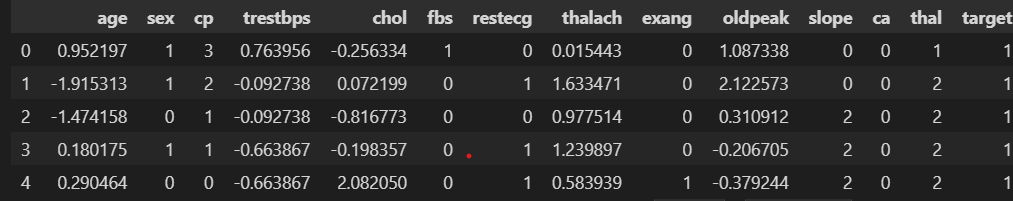

In [23]:
X=df.drop(['target'],axis=1) # axis=1 refers to operations that are performed along the columns.
y=df['target']

spliting dataset for train and test

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)

When you set a specific random_state value, the data splitting process will be deterministic. 
 This means that if you run the code multiple times with the same random_state value, you will get the same split every time.


## logistic regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test) 

In [26]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction1)
cm

array([[36,  4],
       [ 3, 48]], dtype=int64)

<AxesSubplot: >

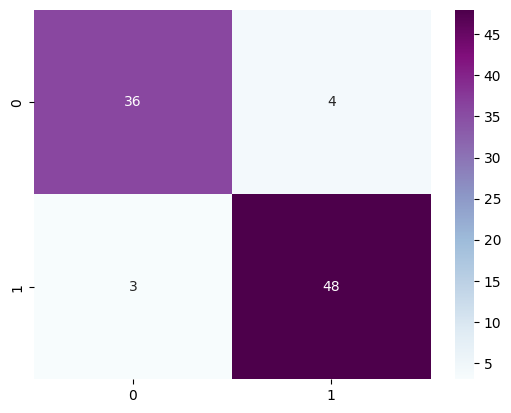

In [27]:
sns.heatmap(cm,annot=True,cmap='BuPu')

In [28]:
TP=cm[0][0]
TN=cm[1][1]
FP=cm[1][0]
FN=cm[0][1]
print('testing accuracy: ',(TP+TN)/(TP+TN+FN+FP))

testing accuracy:  0.9230769230769231


In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction1)

0.9230769230769231

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        40
           1       0.92      0.94      0.93        51

    accuracy                           0.92        91
   macro avg       0.92      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91



-The precision metric represents the proportion of true positives among the instances that the model predicted as positive.
- The recall metric represents the proportion of true positives that were correctly identified by the model.


## Naive Bayes classifier

In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
modelNB=GaussianNB()
modelNB.fit(X_train,y_train)
predicted_NB=modelNB.predict(X_test)

<AxesSubplot: >

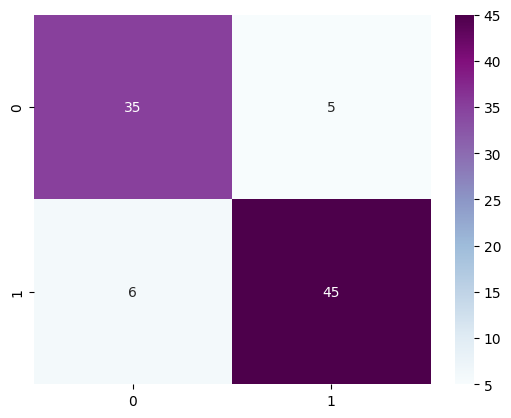

In [33]:
cm_NB=confusion_matrix(y_test,predicted_NB)
sns.heatmap(cm_NB,annot=True,cmap='BuPu')

In [34]:
print(classification_report(y_test,predicted_NB))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        40
           1       0.90      0.88      0.89        51

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



## KNN Classifier 

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [37]:
predicted_knn=knn.predict(X_test)

<AxesSubplot: >

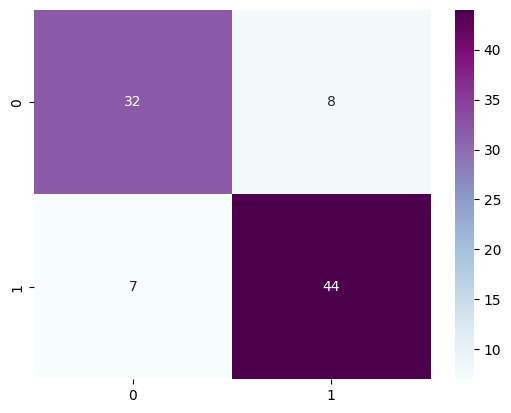

In [38]:
cm_KNN=confusion_matrix(y_test,predicted_knn)
sns.heatmap(cm_KNN,annot=True,cmap='BuPu')

In [39]:
print(classification_report(y_test,predicted_knn))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        40
           1       0.85      0.86      0.85        51

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91



## Suport vector machine

In [40]:
from sklearn.svm import SVC

In [41]:
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [42]:
predicted_svc=classifier.predict(X_test)


<AxesSubplot: >

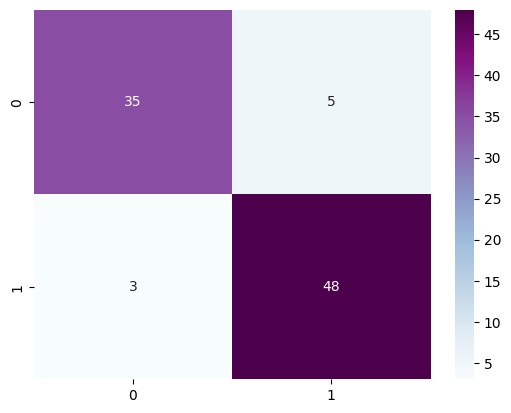

In [43]:
cm_svc=confusion_matrix(y_test,predicted_svc)
sns.heatmap(cm_svc,annot=True,cmap='BuPu')

In [44]:
print(classification_report(y_test,predicted_svc))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        40
           1       0.91      0.94      0.92        51

    accuracy                           0.91        91
   macro avg       0.91      0.91      0.91        91
weighted avg       0.91      0.91      0.91        91



## Adabosting classifier

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


In [46]:
model_tree=DecisionTreeClassifier(criterion='entropy',max_depth=1) # base estimator, weak learner
AdaBoost=AdaBoostClassifier(base_estimator=model_tree,n_estimators=1000,learning_rate=1)
# best_estimator=weak learner
# n_estimator=number of base learner/weak learner
# learning rate=1

In [47]:
boostModel=AdaBoost.fit(X_train,y_train)
predicted_boost=boostModel.predict(X_test)

<AxesSubplot: >

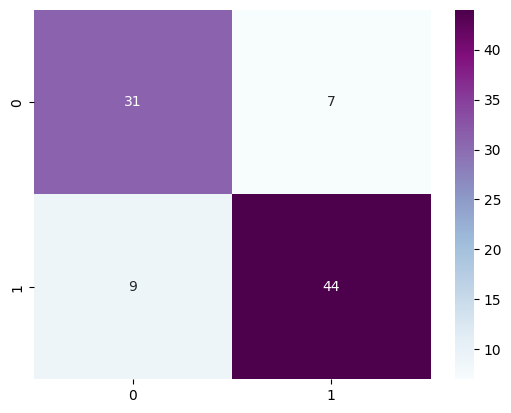

In [48]:
cm_boost=confusion_matrix(predicted_boost,y_test)
sns.heatmap(cm_boost,annot=True,cmap='BuPu')

In [49]:
print(classification_report(y_test,predicted_boost))

              precision    recall  f1-score   support

           0       0.82      0.78      0.79        40
           1       0.83      0.86      0.85        51

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [50]:
import matplotlib.pyplot as plt


In [51]:
algo=['logistic','naive bayse','KNN','SVM','AdaBoost']
accuracy_plot=[92,88,84,91,82]

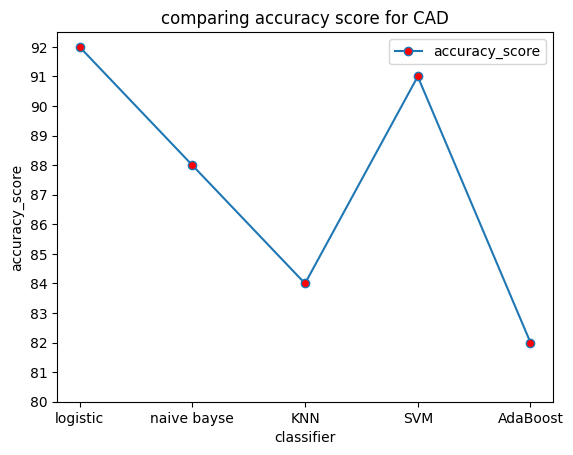

In [52]:
plt.plot(algo,accuracy_plot,label='accuracy_score',marker='o',markerfacecolor='red')
plt.xlabel('classifier')
plt.ylabel('accuracy_score')
plt.title('comparing accuracy score for CAD')
plt.legend()
plt.yticks(range(80,93,1))
plt.show()
